<a href="https://colab.research.google.com/github/momotonton/CSAI_assignment/blob/main/%5B%EB%B0%95%EC%A7%80%ED%9B%88%5D_Section_2_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# 다른분들 코드보면서 다시 공부하겠습니다 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.isnull().sum() # Check Nan Value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
# 1)
# 상관관계 : 어떤 한 통계적 변인과 다른 여러 통계적 변인들이 공변(共變)하는 함수관계를 말한다.
# 피어슨 상관계수 '전체 편차' 내에서 '예측치와 평균 간의 차이'가 차지하는 비율 -1~ 1사이에 위치
corr_matrix = df.corr()
print(corr_matrix["price"].sort_values(ascending=False).iloc[1:2]) # Most hightest correlation coefficient

sqft_living    0.702035
Name: price, dtype: float64


233941.7242725122


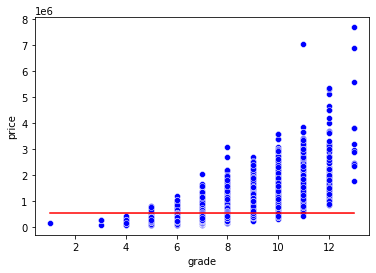

In [42]:
# 2)
# 2-1) 이 부분 잘모르겠습니다.
import matplotlib.pyplot as plt
import seaborn as sns

predict = df["price"].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()
print(mean_absolute_error)

x = df['grade']
y = df['price']
predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()
sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');
# sns.regplot(x=변수, y=타겟);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f478e8ef310>,
      dtype=object)

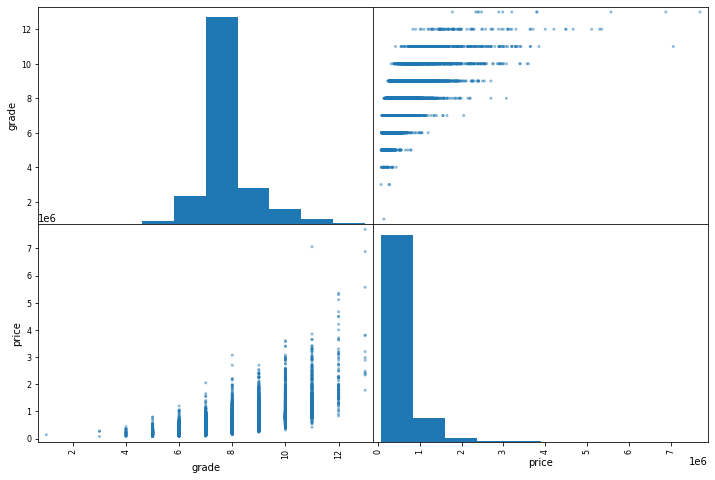

In [32]:
# 2-2)
from pandas.plotting import scatter_matrix

# Grade & Price scatter graph
attributes = ["grade","price"]
scatter_matrix(df[attributes] , figsize=(12,8))

In [43]:
# 3)

model = LinearRegression()
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]
model.fit(X_train, y_train)
X_test = [[6]]
y_pred = model.predict(X_test)
print(f'{X_test[0][0]} Grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 Grade를 가지는 주택의 예상 가격은 $194700 입니다.


In [37]:
# 4) 

## 계수(coefficient)
model.coef_
## 절편(intercept)
model.intercept_

def explain_prediction(price):
    y_pred = model.predict([[price]])
    pred = f"{int(price)}grade의 주택 가격 예측: ${int(y_pred[0])} (1 grade당 추가금: ${int(model.coef_[0])})"

    return pred

print(explain_prediction(6))
print(int(model.coef_[0]))


6grade의 주택 가격 예측: $194700 (1 grade당 추가금: $208457)
208457
